In [ ]:
# Target: next quarter's net income
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv("preprocessed_merged_financial_data.csv")
df["target_next_quarter_netIncome"] = df.groupby("ticker")["netIncome"].shift(-1)
df.head(-1)

,Unnamed: 0,fiscalDateEnding,ticker,operatingIncome,ebit,incomeBeforeTax,incomeTaxExpense,netIncome,nonOperatingItems,netInterest,target_next_quarter_netIncome
0,0,2005-03-31,AAPL,402000000,402000000,435000000,145000000,290000000,-33000000,-33000000,319000000
1,1,2005-06-30,AAPL,426000000,426000000,472000000,153000000,319000000,-46000000,-46000000,430000000
2,2,2005-09-30,AAPL,418000000,418000000,478000000,48000000,430000000,-60000000,-60000000,565000000
3,3,2005-12-31,AAPL,750000000,750000000,831000000,266000000,565000000,-81000000,-81000000,410000000
4,4,2006-03-31,AAPL,529000000,529000000,605000000,195000000,410000000,-76000000,-76000000,472000000
...,...,...,...,...,...,...,...,...,...,...,...
773,773,2023-12-31,UNH,7689000000,6510000000,6859000000,1184000000,5455000000,-830000000,-830000000,-1409000000
774,774,2024-03-31,UNH,7931000000,845000000,1000000,1222000000,-1409000000,-844000000,-844000000,4216000000
775,775,2024-06-30,UNH,7875000000,6650000000,5665000000,1244000000,4216000000,-985000000,-985000000,6055000000
776,776,2024-09-30,UNH,8708000000,8688000000,7614000000,1356000000,6055000000,-1074000000,-1074000000,5543000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
fiscalDateEnding,0
ticker,0
operatingIncome,0
ebit,0
incomeBeforeTax,0
incomeTaxExpense,0
netIncome,0
nonOperatingItems,0
netInterest,0


                   operatingIncome  incomeBeforeTax  incomeTaxExpense  \
operatingIncome                  1                1                 1   
incomeBeforeTax                  1                1                 1   
incomeTaxExpense                 1                1                 1   
netIncome                        1                1                 1   
nonOperatingItems                0                0                 0   
netInterest                      0                0                 0   

                   netIncome  nonOperatingItems  netInterest  
operatingIncome            1                  0            0  
incomeBeforeTax            1                  0            0  
incomeTaxExpense           1                  0            0  
netIncome                  1                  0            0  
nonOperatingItems          0                  1           -0  
netInterest                0                 -0            1  


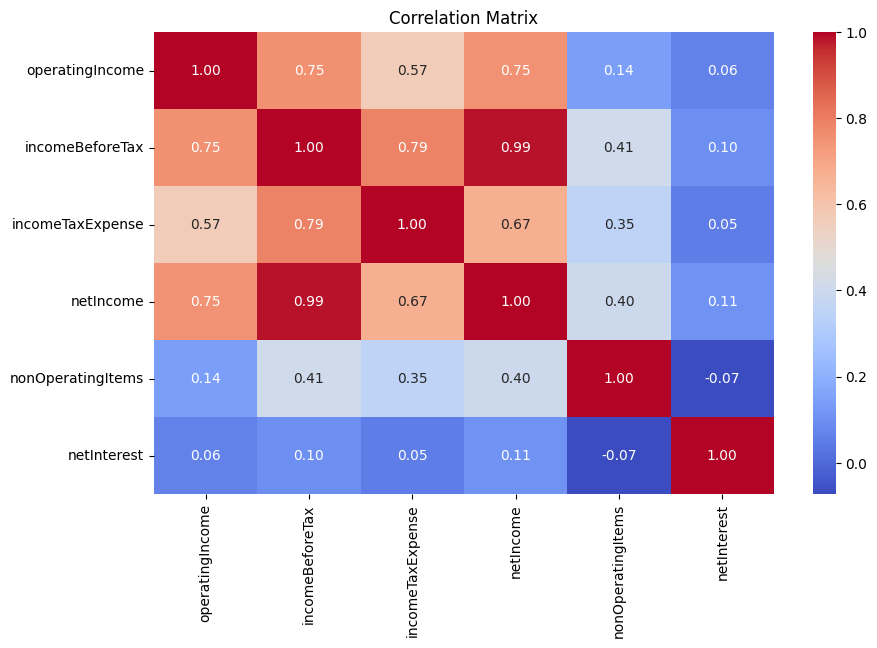

In [ ]:
features = [
    "operatingIncome",
    "incomeBeforeTax",
    "incomeTaxExpense",
    "netIncome",
    "nonOperatingItems",
    "netInterest"
]

df_corr = df[features].copy()
correlation_matrix = df_corr.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
